# IMPORT PACKAGE

In [1]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [2]:
cd C:\Users\Dubun\IronHack\Other\Labs\Final project\database

C:\Users\Dubun\IronHack\Other\Labs\Final project\database


## Initial DF

In [3]:
df = pd.read_csv('df_cleaned.csv')
df

,track_id,artist_id,artist_name,artist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,artist_followers,in_spotify_fr_playlist,release_year_y,duration_s,era
0,3RvVFTMSlEXJjtoLrcDflF,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.499,0.362,7,-16.331,1,0.0378,0.186000,0.175000,0.1190,0.354,177.691,4,38,10948,0,2006,3.91,1990-2010
1,5w8bF2RGgf9PkXEoEl8SSN,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.398,0.685,7,-9.098,0,0.0417,0.417000,0.005580,0.0787,0.376,109.994,4,32,10948,0,2013,3.09,2011-2020
2,5u9zU1N1urKWaULrbEhMpr,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.714,0.928,0,-7.118,1,0.0385,0.034300,0.746000,0.1370,0.487,120.007,4,29,10948,0,2018,3.60,2011-2020
3,1TC9cYi9ZlEAhpoyd5sYn4,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.519,0.728,4,-6.660,0,0.0290,0.103000,0.000518,0.0652,0.321,86.026,4,26,10948,0,2016,3.78,2011-2020
4,2YiGsf5CLUtgty23h1RNOQ,41EfC0kQmOWfbW2FBGttze,La Maison Tellier,rock,0.574,0.635,3,-6.683,1,0.0242,0.000765,0.001020,0.3640,0.521,99.994,4,10,10948,0,2019,4.11,2011-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20582,4kP1f09mjeK56QEykWC7Sk,2y7twK2fqUipb5Ef2hNrdO,KIZ,pop,0.762,0.451,5,-9.501,0,0.0848,0.257000,0.000000,0.0984,0.874,129.918,4,6,2788,0,2020,3.15,>2020
20583,0LA1EZMkLVyafay8DQjS21,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.709,0.724,3,-4.928,1,0.0608,0.316000,0.000000,0.0623,0.495,109.079,4,24,990,0,2020,2.89,>2020
20584,6JYM6Dz5szNhAIHlAd37Cb,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.429,0.787,5,-6.510,0,0.2840,0.075100,0.000000,0.0879,0.563,60.031,4,22,990,0,2019,2.77,2011-2020
20585,6frPNZ8woC8jH3rgjRRSUL,5LFX3E1nLxOMLWOHSFwbG0,CASANOVA,pop,0.724,0.686,8,-5.040,0,0.0660,0.155000,0.000000,0.0544,0.750,119.031,4,15,990,0,2021,2.56,>2020


## Features description

- artist_genre: the dominant genre associated to the artist


- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.


- loudness:The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


- mode:Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.


- speechiness:Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


- acousticness:A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


- instrumentalness:Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


- liveness:Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


- valence:A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


- tempo:The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


- time_signature:An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).


- popularity: spotify calculated popularity score of the track. This is the target variable


- artist_followers: number of followers an artist has on spotify


- in_spotify_fr_playlists: indicates the presence of the track in a spotify published playlist (french market)


- release_year: the year the track was released (based on the album release date)


- duration_s: length of the track (in second)


- era: era in which the track was released (based on release_year)

In [4]:
df_ml = df.drop(['artist_id','artist_name','release_year_y'], axis = 1)
df_ml = df_ml.set_index('track_id')
df_ml

,artist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,artist_followers,in_spotify_fr_playlist,duration_s,era
track_id,,,,,,,,,,,,,,,,,,
3RvVFTMSlEXJjtoLrcDflF,rock,0.499,0.362,7,-16.331,1,0.0378,0.186000,0.175000,0.1190,0.354,177.691,4,38,10948,0,3.91,1990-2010
5w8bF2RGgf9PkXEoEl8SSN,rock,0.398,0.685,7,-9.098,0,0.0417,0.417000,0.005580,0.0787,0.376,109.994,4,32,10948,0,3.09,2011-2020
5u9zU1N1urKWaULrbEhMpr,rock,0.714,0.928,0,-7.118,1,0.0385,0.034300,0.746000,0.1370,0.487,120.007,4,29,10948,0,3.60,2011-2020
1TC9cYi9ZlEAhpoyd5sYn4,rock,0.519,0.728,4,-6.660,0,0.0290,0.103000,0.000518,0.0652,0.321,86.026,4,26,10948,0,3.78,2011-2020
2YiGsf5CLUtgty23h1RNOQ,rock,0.574,0.635,3,-6.683,1,0.0242,0.000765,0.001020,0.3640,0.521,99.994,4,10,10948,0,4.11,2011-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4kP1f09mjeK56QEykWC7Sk,pop,0.762,0.451,5,-9.501,0,0.0848,0.257000,0.000000,0.0984,0.874,129.918,4,6,2788,0,3.15,>2020
0LA1EZMkLVyafay8DQjS21,pop,0.709,0.724,3,-4.928,1,0.0608,0.316000,0.000000,0.0623,0.495,109.079,4,24,990,0,2.89,>2020
6JYM6Dz5szNhAIHlAd37Cb,pop,0.429,0.787,5,-6.510,0,0.2840,0.075100,0.000000,0.0879,0.563,60.031,4,22,990,0,2.77,2011-2020


# LINEAR REGRESSION

## EDA 

### Correlation

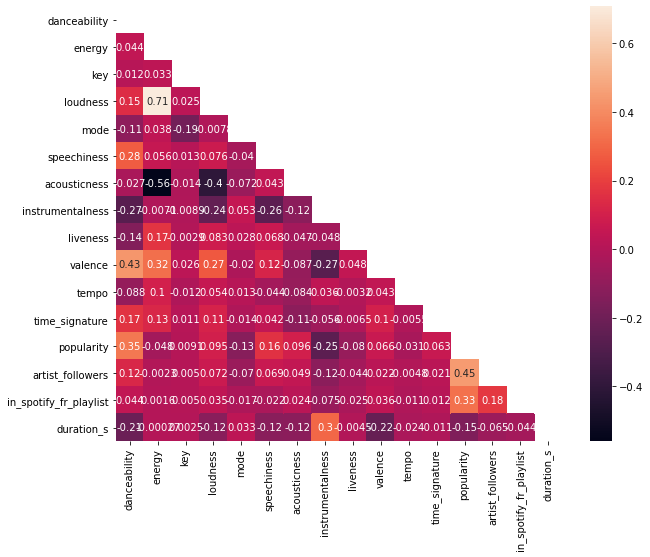

In [5]:
mask = np.zeros_like(df_ml.corr())

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_ml.corr(), mask=mask, annot=True)
plt.show()

In the above matrix, we can see that the highest correlation is between loudness and energy. However the coefficient is below 0.8, so I will keep both as features.

We can also see that the target variable 'popularity' shows strong correlations with artist_followers and danceability and moderate correlations with instrumentalness, mode and speechiness.

### Features format

In [6]:
df_ml['mode'] =df_ml['mode'].astype(str)
df_ml['time_signature'] =df_ml['time_signature'].astype(str)
df_ml['in_spotify_fr_playlist'] =df_ml['in_spotify_fr_playlist'].astype(str)
df_ml['key'] =df_ml['key'].astype(str)

Making the four above features as strings

In [7]:
for col in df_ml.select_dtypes('object'):
    print(df_ml[col].value_counts(), '\n')

pop        6059
hip_hop    5924
rock       5767
electro    2837
Name: artist_genre, dtype: int64 

7     2331
0     2283
9     2240
2     2063
1     2004
11    1781
4     1687
5     1637
6     1397
10    1389
8     1186
3      589
Name: key, dtype: int64 

1    10538
0    10049
Name: mode, dtype: int64 

4    18910
3     1254
5      279
1      140
0        4
Name: time_signature, dtype: int64 

0    19519
1     1068
Name: in_spotify_fr_playlist, dtype: int64 

2011-2020    9195
1990-2010    5290
>2020        5119
<1990         983
Name: era, dtype: int64 



### Raw data distribution

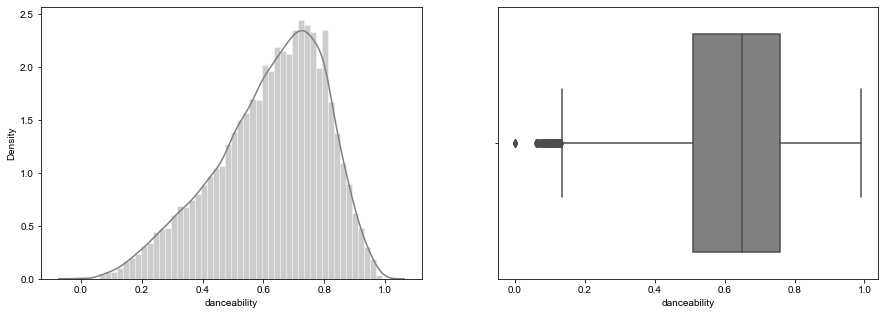

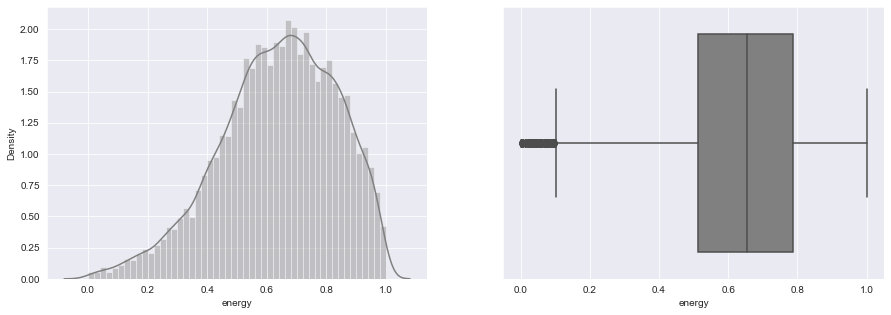

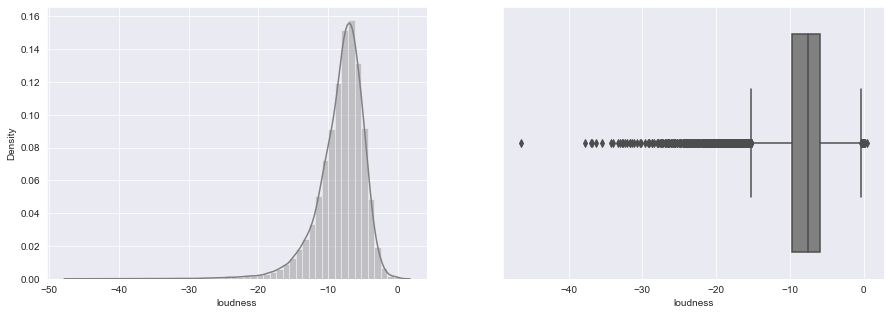

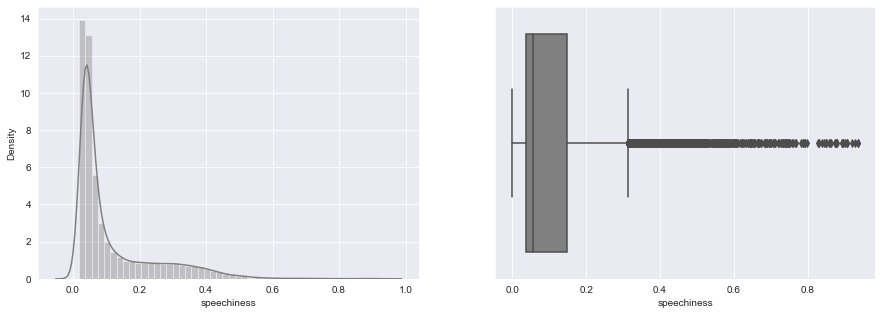

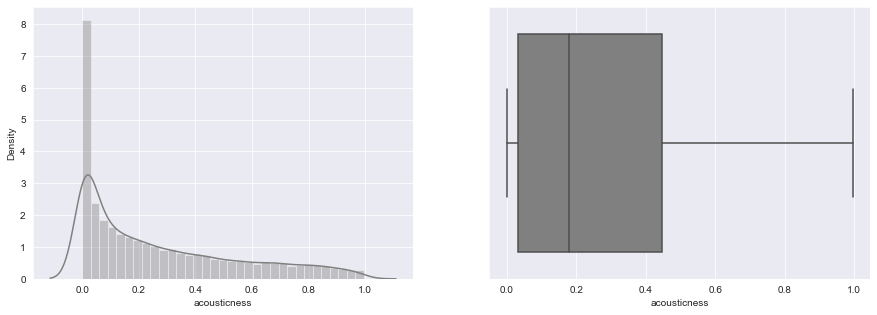

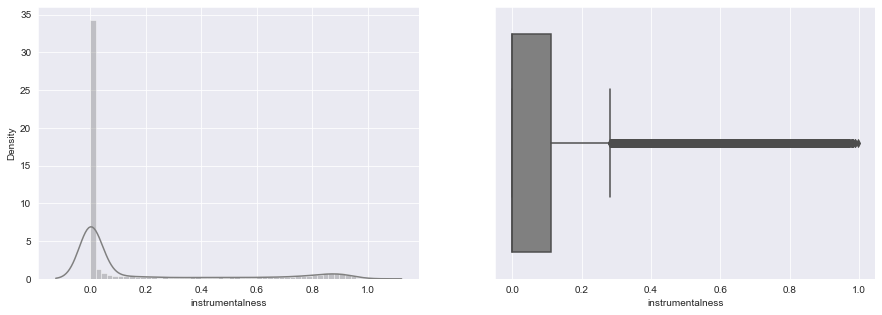

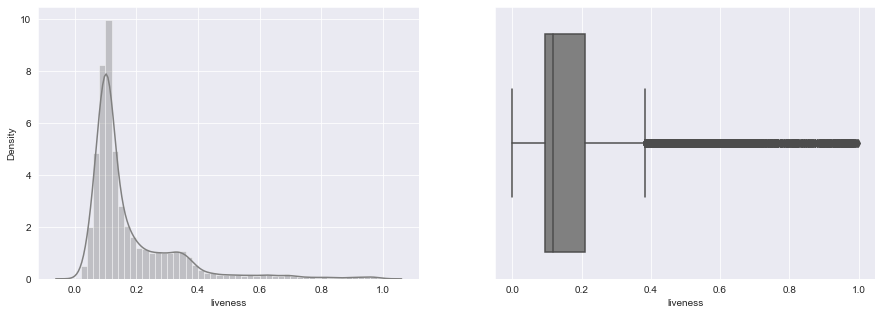

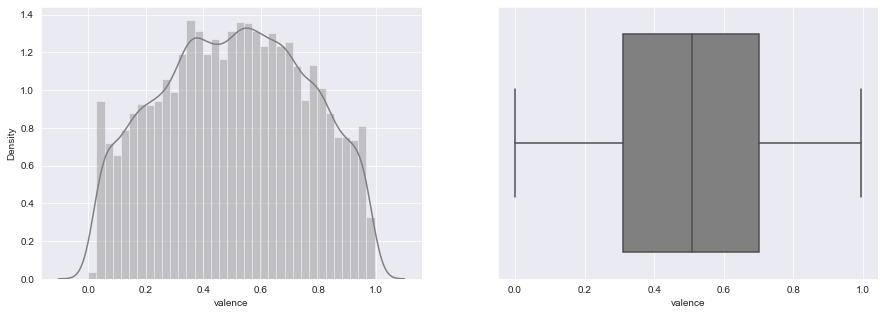

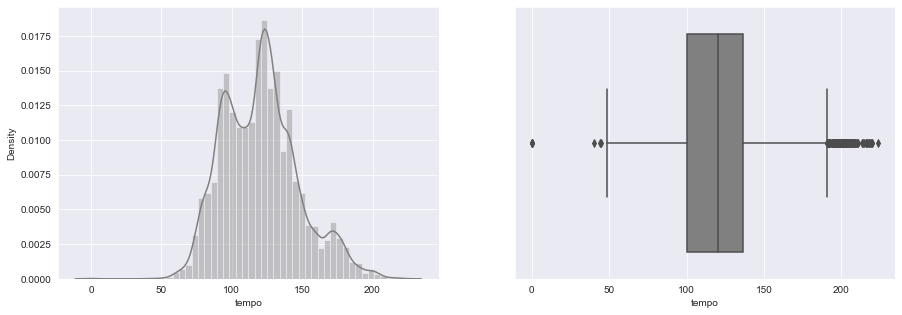

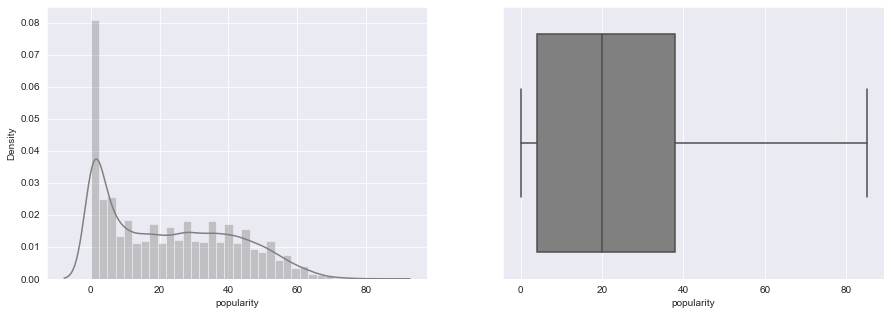

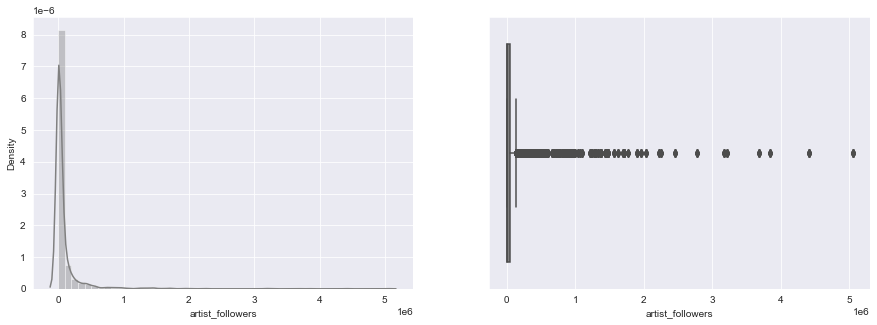

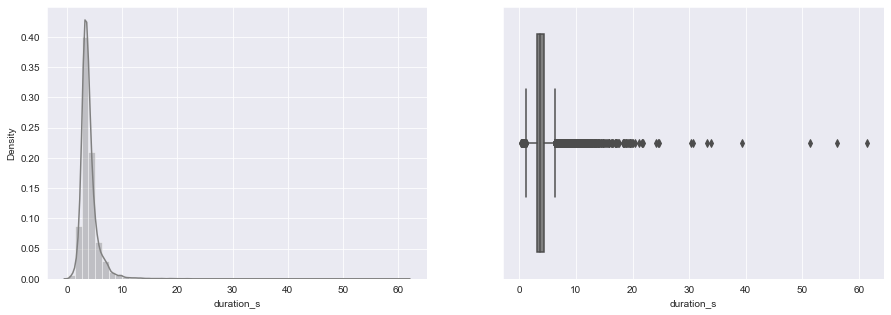

In [8]:
num = df_ml.select_dtypes('number')
for c in num.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.set_style("darkgrid")
    sns.distplot(num[c], ax=axes[0],  color = 'gray')
    sns.boxplot(num[c], ax=axes[1],  color = 'gray')
    plt.show()

As we can see, not all graphs' features are normally distributed, which is pre requisite to perform linear regressions. To make it normally distributed, I will remove outliers.

In [9]:
df = df_ml.copy()

In [10]:
num = df_ml.select_dtypes('number')

### Removing outliers

In [11]:
def remove_outliers(df_ml, threshold=1.5, in_columns=df_ml.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df_ml[column],75)
            lower = np.percentile(df_ml[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df_ml = df_ml[(df_ml[column]>lower_limit) & (df_ml[column]<upper_limit)]
    return df_ml

Using the above function to remove outliers. I consider outliers as any datapoint having a value greater or lower than 1.5 times interquartile 1 or 3.

In [12]:
df_o = remove_outliers(df_ml, threshold=1.5, skip_columns=['popularity']) # we don't want to reduce our data too much,
df_o

,artist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,artist_followers,in_spotify_fr_playlist,duration_s,era
track_id,,,,,,,,,,,,,,,,,,
5w8bF2RGgf9PkXEoEl8SSN,rock,0.398,0.685,7,-9.098,0,0.0417,0.417000,0.005580,0.0787,0.376,109.994,4,32,10948,0,3.09,2011-2020
1TC9cYi9ZlEAhpoyd5sYn4,rock,0.519,0.728,4,-6.660,0,0.0290,0.103000,0.000518,0.0652,0.321,86.026,4,26,10948,0,3.78,2011-2020
2YiGsf5CLUtgty23h1RNOQ,rock,0.574,0.635,3,-6.683,1,0.0242,0.000765,0.001020,0.3640,0.521,99.994,4,10,10948,0,4.11,2011-2020
3AJaqqDSA7z71SdV17zU9V,rock,0.455,0.727,9,-7.742,0,0.0434,0.123000,0.000009,0.1100,0.230,155.911,4,19,10948,0,3.45,2011-2020
4Ak5UWrKlJnxfzqhqWK0Gy,rock,0.439,0.274,2,-9.411,1,0.0719,0.499000,0.000000,0.0947,0.231,168.306,4,18,10948,0,5.52,2011-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4kP1f09mjeK56QEykWC7Sk,pop,0.762,0.451,5,-9.501,0,0.0848,0.257000,0.000000,0.0984,0.874,129.918,4,6,2788,0,3.15,>2020
0LA1EZMkLVyafay8DQjS21,pop,0.709,0.724,3,-4.928,1,0.0608,0.316000,0.000000,0.0623,0.495,109.079,4,24,990,0,2.89,>2020
6JYM6Dz5szNhAIHlAd37Cb,pop,0.429,0.787,5,-6.510,0,0.2840,0.075100,0.000000,0.0879,0.563,60.031,4,22,990,0,2.77,2011-2020


### No outliers distribution

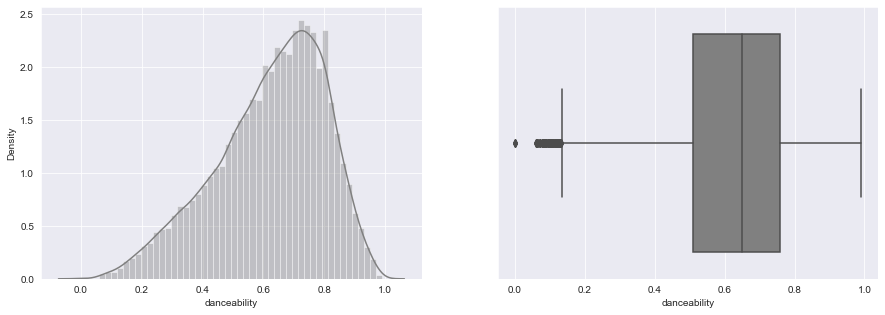

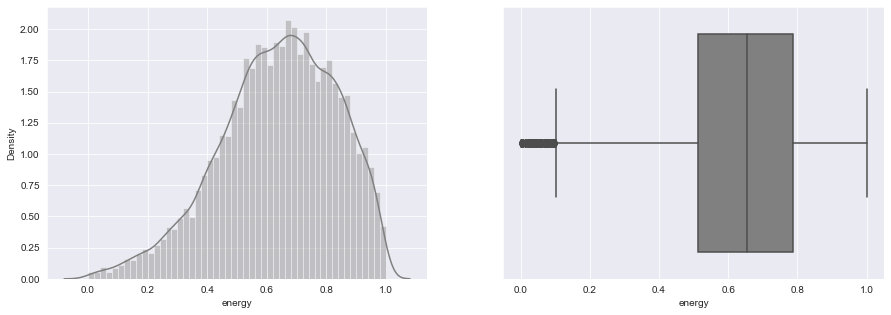

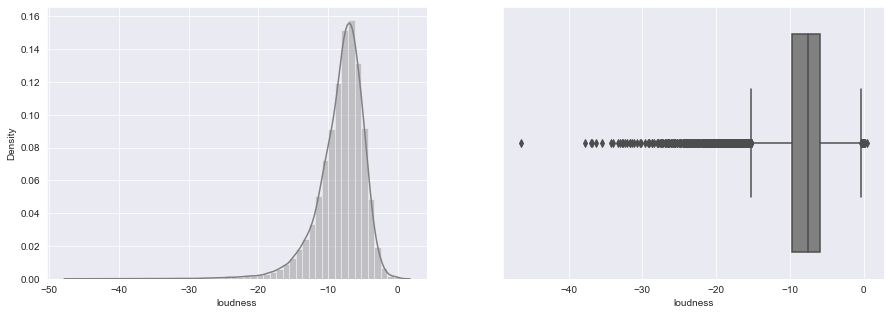

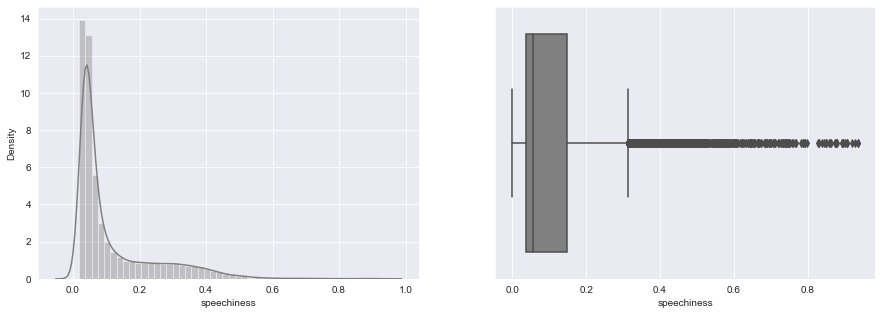

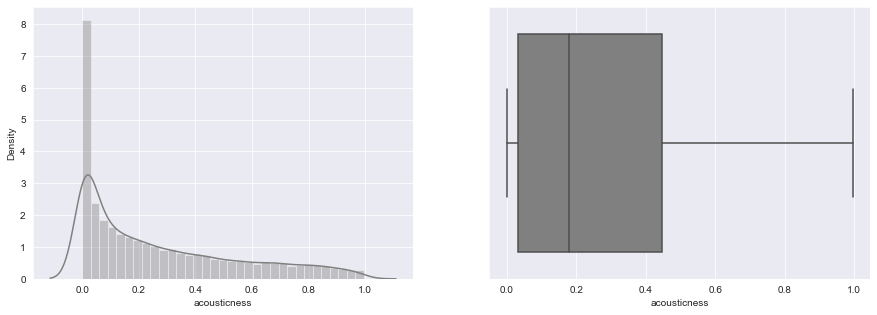

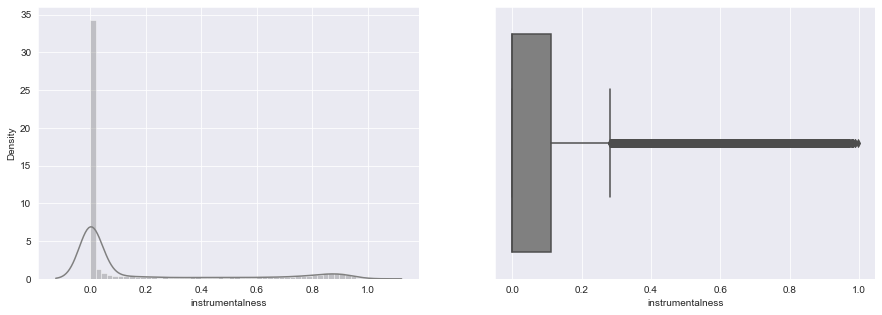

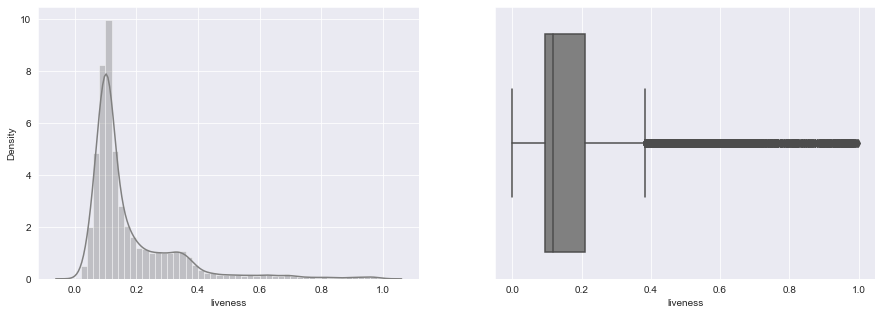

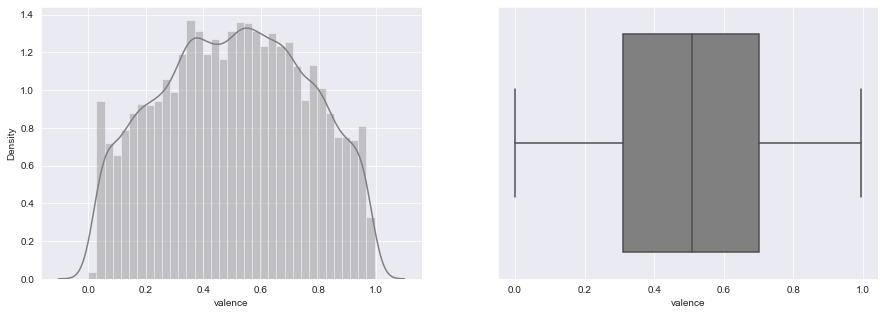

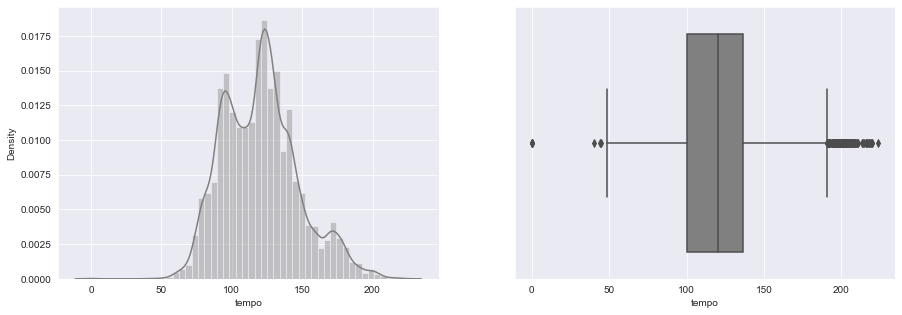

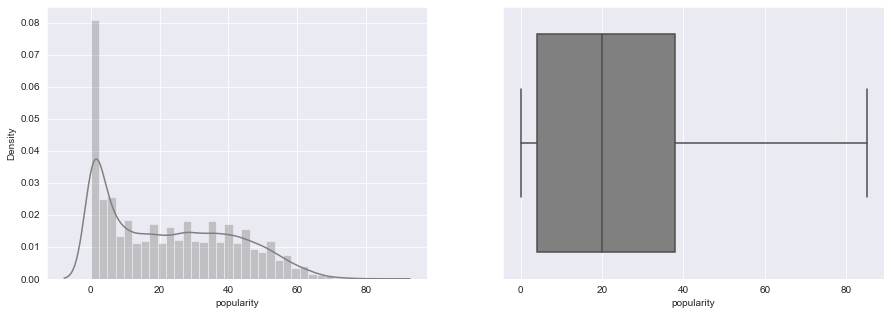

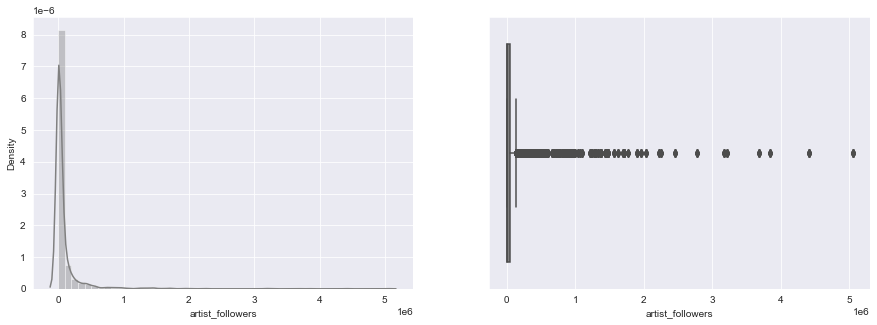

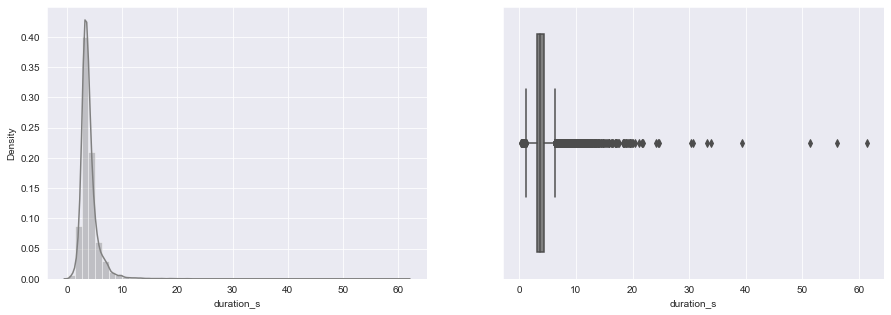

In [13]:
numericals = df_o.select_dtypes('number')
for c in num.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.set_style("darkgrid")
    sns.distplot(num[c], ax=axes[0],  color = 'gray')
    sns.boxplot(num[c], ax=axes[1],  color = 'gray')
    plt.show()

In [14]:
df_o = df_o.reset_index()
df_o

,track_id,artist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,artist_followers,in_spotify_fr_playlist,duration_s,era
0,5w8bF2RGgf9PkXEoEl8SSN,rock,0.398,0.685,7,-9.098,0,0.0417,0.417000,0.005580,0.0787,0.376,109.994,4,32,10948,0,3.09,2011-2020
1,1TC9cYi9ZlEAhpoyd5sYn4,rock,0.519,0.728,4,-6.660,0,0.0290,0.103000,0.000518,0.0652,0.321,86.026,4,26,10948,0,3.78,2011-2020
2,2YiGsf5CLUtgty23h1RNOQ,rock,0.574,0.635,3,-6.683,1,0.0242,0.000765,0.001020,0.3640,0.521,99.994,4,10,10948,0,4.11,2011-2020
3,3AJaqqDSA7z71SdV17zU9V,rock,0.455,0.727,9,-7.742,0,0.0434,0.123000,0.000009,0.1100,0.230,155.911,4,19,10948,0,3.45,2011-2020
4,4Ak5UWrKlJnxfzqhqWK0Gy,rock,0.439,0.274,2,-9.411,1,0.0719,0.499000,0.000000,0.0947,0.231,168.306,4,18,10948,0,5.52,2011-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,4kP1f09mjeK56QEykWC7Sk,pop,0.762,0.451,5,-9.501,0,0.0848,0.257000,0.000000,0.0984,0.874,129.918,4,6,2788,0,3.15,>2020
10802,0LA1EZMkLVyafay8DQjS21,pop,0.709,0.724,3,-4.928,1,0.0608,0.316000,0.000000,0.0623,0.495,109.079,4,24,990,0,2.89,>2020
10803,6JYM6Dz5szNhAIHlAd37Cb,pop,0.429,0.787,5,-6.510,0,0.2840,0.075100,0.000000,0.0879,0.563,60.031,4,22,990,0,2.77,2011-2020
10804,6frPNZ8woC8jH3rgjRRSUL,pop,0.724,0.686,8,-5.040,0,0.0660,0.155000,0.000000,0.0544,0.750,119.031,4,15,990,0,2.56,>2020


### Normalizing features

In [15]:
y = df_o['popularity']
X = df_o.drop(['popularity'], axis=1)

In [16]:
num = X.select_dtypes('number')
transformer = StandardScaler().fit(num)
x_standardized = transformer.transform(num)
num_norm = pd.DataFrame(x_standardized, columns = num.columns)
num_norm

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_followers,duration_s
0,-1.558868,0.236879,-0.588278,-0.614955,0.517591,-0.263011,-0.820652,-0.694123,-0.389310,-0.438183,-0.630132
1,-0.790510,0.474548,0.359274,-0.775551,-0.649232,-0.351810,-0.977951,-0.924627,-1.337221,-0.438183,0.253831
2,-0.441256,-0.039480,0.350335,-0.836249,-1.029137,-0.343004,2.503611,-0.086432,-0.784800,-0.438183,0.676596
3,-1.196914,0.469021,-0.061255,-0.593458,-0.574912,-0.360733,-0.455950,-1.306006,1.426663,-0.438183,-0.168934
4,-1.298515,-2.034794,-0.709928,-0.233065,0.822303,-0.360897,-0.634223,-1.301815,1.916873,-0.438183,2.482956
...,...,...,...,...,...,...,...,...,...,...,...
10801,0.752556,-1.056482,-0.744908,-0.069940,-0.076968,-0.360897,-0.591111,1.392982,0.398665,-0.627905,-0.553266
10802,0.416003,0.452439,1.032433,-0.373428,0.142276,-0.360897,-1.011741,-0.195397,-0.425497,-0.669709,-0.886353
10803,-1.362016,0.800652,0.417573,2.449016,-0.752908,-0.360897,-0.713455,0.089589,-2.365298,-0.669709,-1.040086
10804,0.511254,0.242406,0.988903,-0.307673,-0.456000,-0.360897,-1.103791,0.873301,-0.031905,-0.669709,-1.309118


In [17]:
cat = X.select_dtypes('object')
cat

,track_id,artist_genre,key,mode,time_signature,in_spotify_fr_playlist,era
0,5w8bF2RGgf9PkXEoEl8SSN,rock,7,0,4,0,2011-2020
1,1TC9cYi9ZlEAhpoyd5sYn4,rock,4,0,4,0,2011-2020
2,2YiGsf5CLUtgty23h1RNOQ,rock,3,1,4,0,2011-2020
3,3AJaqqDSA7z71SdV17zU9V,rock,9,0,4,0,2011-2020
4,4Ak5UWrKlJnxfzqhqWK0Gy,rock,2,1,4,0,2011-2020
...,...,...,...,...,...,...,...
10801,4kP1f09mjeK56QEykWC7Sk,pop,5,0,4,0,>2020
10802,0LA1EZMkLVyafay8DQjS21,pop,3,1,4,0,>2020
10803,6JYM6Dz5szNhAIHlAd37Cb,pop,5,0,4,0,2011-2020
10804,6frPNZ8woC8jH3rgjRRSUL,pop,8,0,4,0,>2020


In [18]:
X = num_norm.merge(cat, left_index = True, right_index = True)
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_followers,duration_s,track_id,artist_genre,key,mode,time_signature,in_spotify_fr_playlist,era
0,-1.558868,0.236879,-0.588278,-0.614955,0.517591,-0.263011,-0.820652,-0.694123,-0.389310,-0.438183,-0.630132,5w8bF2RGgf9PkXEoEl8SSN,rock,7,0,4,0,2011-2020
1,-0.790510,0.474548,0.359274,-0.775551,-0.649232,-0.351810,-0.977951,-0.924627,-1.337221,-0.438183,0.253831,1TC9cYi9ZlEAhpoyd5sYn4,rock,4,0,4,0,2011-2020
2,-0.441256,-0.039480,0.350335,-0.836249,-1.029137,-0.343004,2.503611,-0.086432,-0.784800,-0.438183,0.676596,2YiGsf5CLUtgty23h1RNOQ,rock,3,1,4,0,2011-2020
3,-1.196914,0.469021,-0.061255,-0.593458,-0.574912,-0.360733,-0.455950,-1.306006,1.426663,-0.438183,-0.168934,3AJaqqDSA7z71SdV17zU9V,rock,9,0,4,0,2011-2020
4,-1.298515,-2.034794,-0.709928,-0.233065,0.822303,-0.360897,-0.634223,-1.301815,1.916873,-0.438183,2.482956,4Ak5UWrKlJnxfzqhqWK0Gy,rock,2,1,4,0,2011-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,0.752556,-1.056482,-0.744908,-0.069940,-0.076968,-0.360897,-0.591111,1.392982,0.398665,-0.627905,-0.553266,4kP1f09mjeK56QEykWC7Sk,pop,5,0,4,0,>2020
10802,0.416003,0.452439,1.032433,-0.373428,0.142276,-0.360897,-1.011741,-0.195397,-0.425497,-0.669709,-0.886353,0LA1EZMkLVyafay8DQjS21,pop,3,1,4,0,>2020
10803,-1.362016,0.800652,0.417573,2.449016,-0.752908,-0.360897,-0.713455,0.089589,-2.365298,-0.669709,-1.040086,6JYM6Dz5szNhAIHlAd37Cb,pop,5,0,4,0,2011-2020
10804,0.511254,0.242406,0.988903,-0.307673,-0.456000,-0.360897,-1.103791,0.873301,-0.031905,-0.669709,-1.309118,6frPNZ8woC8jH3rgjRRSUL,pop,8,0,4,0,>2020


### No outliers and normalized data distribution

In [19]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

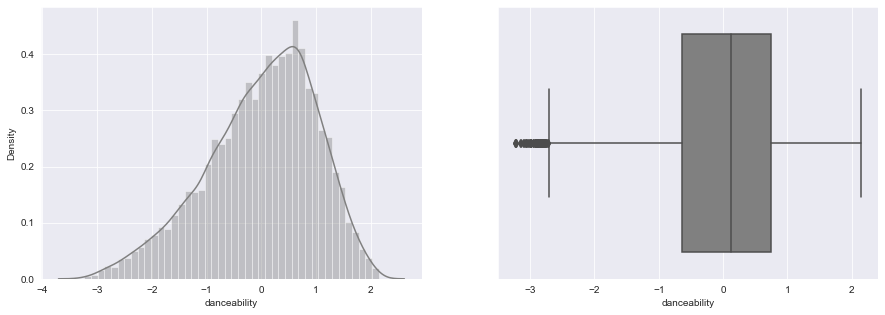

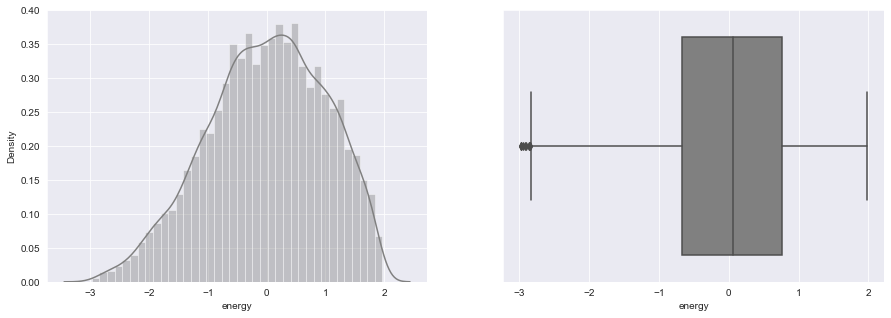

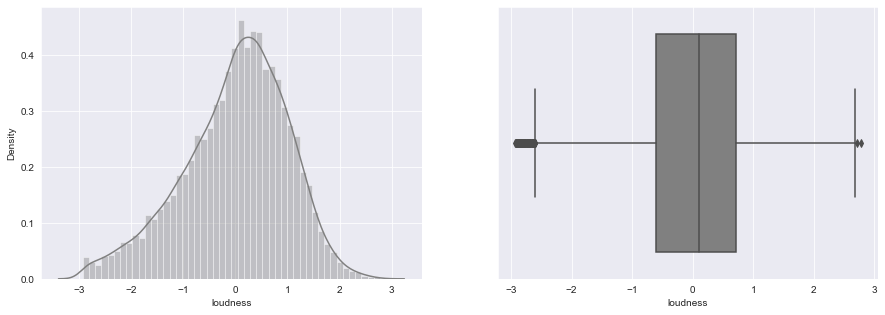

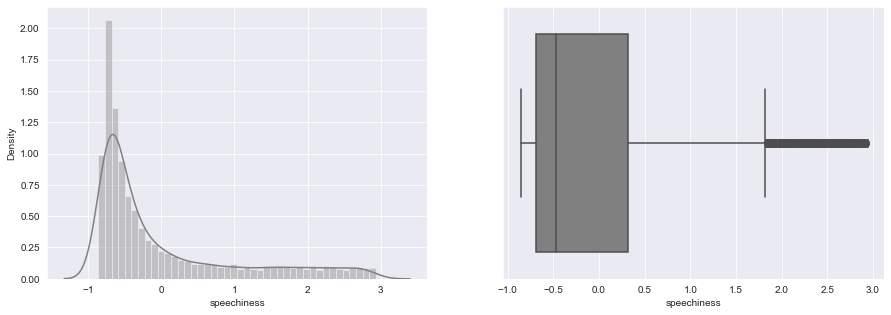

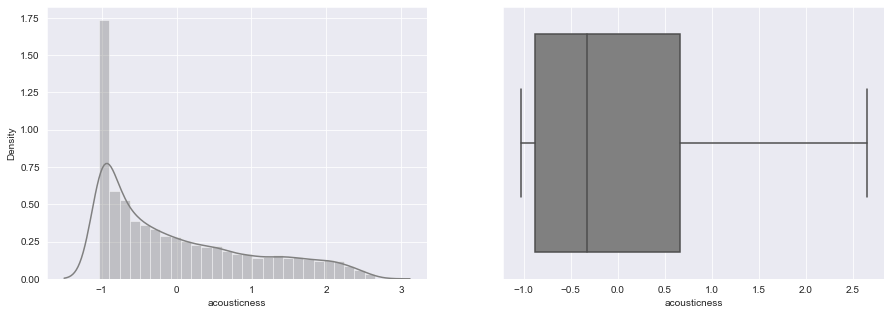

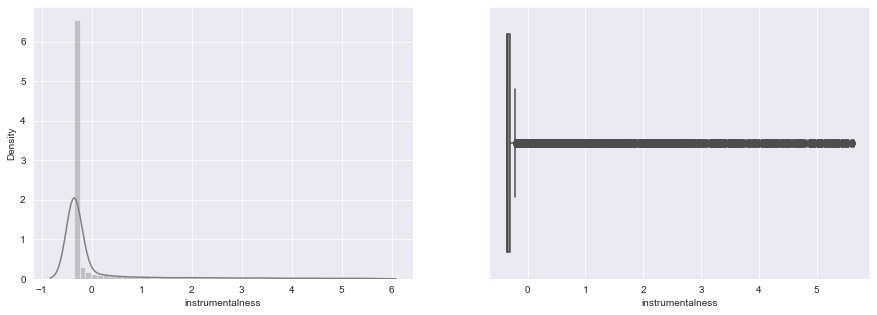

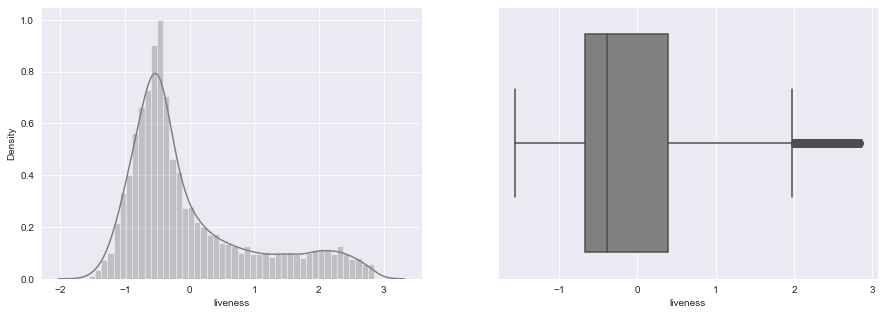

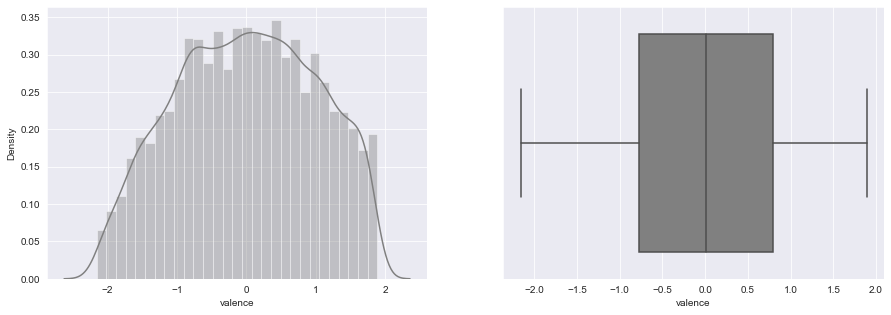

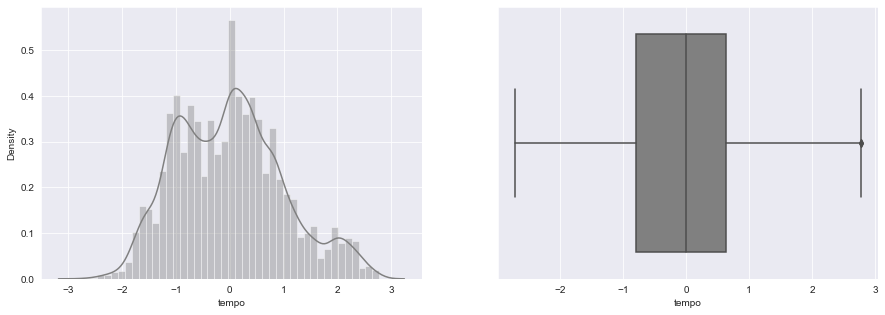

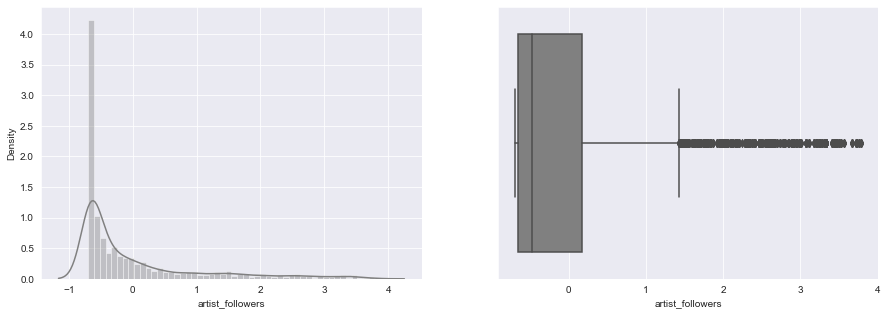

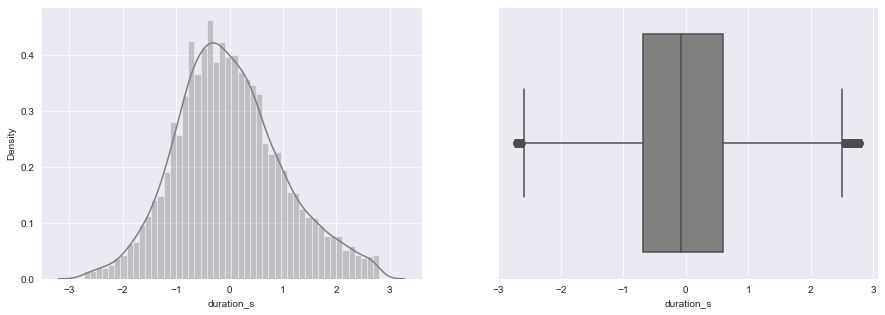

In [20]:
for c in X_num.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.set_style("darkgrid")
    sns.distplot(X_num[c], ax=axes[0],  color = 'gray')
    sns.boxplot(X_num[c], ax=axes[1],  color = 'gray')
    plt.show()

### Encoding categorical features

In [21]:
X = X.set_index('track_id')

In [22]:
X = pd.get_dummies(X, drop_first=True) # i'm lazy
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_followers,duration_s,artist_genre_hip_hop,artist_genre_pop,artist_genre_rock,key_1,key_10,key_11,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,mode_1,time_signature_3,time_signature_4,time_signature_5,in_spotify_fr_playlist_1,era_2011-2020,era_<1990,era_>2020
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5w8bF2RGgf9PkXEoEl8SSN,-1.558868,0.236879,-0.588278,-0.614955,0.517591,-0.263011,-0.820652,-0.694123,-0.389310,-0.438183,-0.630132,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1TC9cYi9ZlEAhpoyd5sYn4,-0.790510,0.474548,0.359274,-0.775551,-0.649232,-0.351810,-0.977951,-0.924627,-1.337221,-0.438183,0.253831,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2YiGsf5CLUtgty23h1RNOQ,-0.441256,-0.039480,0.350335,-0.836249,-1.029137,-0.343004,2.503611,-0.086432,-0.784800,-0.438183,0.676596,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3AJaqqDSA7z71SdV17zU9V,-1.196914,0.469021,-0.061255,-0.593458,-0.574912,-0.360733,-0.455950,-1.306006,1.426663,-0.438183,-0.168934,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4Ak5UWrKlJnxfzqhqWK0Gy,-1.298515,-2.034794,-0.709928,-0.233065,0.822303,-0.360897,-0.634223,-1.301815,1.916873,-0.438183,2.482956,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4kP1f09mjeK56QEykWC7Sk,0.752556,-1.056482,-0.744908,-0.069940,-0.076968,-0.360897,-0.591111,1.392982,0.398665,-0.627905,-0.553266,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
0LA1EZMkLVyafay8DQjS21,0.416003,0.452439,1.032433,-0.373428,0.142276,-0.360897,-1.011741,-0.195397,-0.425497,-0.669709,-0.886353,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
6JYM6Dz5szNhAIHlAd37Cb,-1.362016,0.800652,0.417573,2.449016,-0.752908,-0.360897,-0.713455,0.089589,-2.365298,-0.669709,-1.040086,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


## Model

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
predictions = model.predict(X_test)

In [26]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.526186128704887, 9.208470939221808, 11.405732299432637)

In [27]:
LR_A_score = r2_score(y_test, predictions)

In [28]:
model.coef_

array([ 2.41764777,  0.04152434,  0.17880773, -0.19123839,  0.61155453,
       -0.32728916, -0.35077072, -0.93878789,  0.07880102,  9.06309181,
       -0.34910232, -2.17785239, -6.22595458, -6.94910637,  0.46036089,
        0.99180474,  0.09222157, -0.35219783,  0.40848618,  0.37501203,
        1.16053666,  1.50378803, -0.75349962,  2.29909408, -0.43949706,
       -1.16239306, -1.40763993, -0.05886757,  1.16033173, 16.47955563,
        1.34147805,  2.92255515,  5.72993938])

supervised: KNN, decision tree, random forest, logistic regression
unsupervised: k-means

# KNN ALGORYTHM

In [29]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_followers,duration_s,artist_genre_hip_hop,artist_genre_pop,artist_genre_rock,key_1,key_10,key_11,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,mode_1,time_signature_3,time_signature_4,time_signature_5,in_spotify_fr_playlist_1,era_2011-2020,era_<1990,era_>2020
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5w8bF2RGgf9PkXEoEl8SSN,-1.558868,0.236879,-0.588278,-0.614955,0.517591,-0.263011,-0.820652,-0.694123,-0.389310,-0.438183,-0.630132,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1TC9cYi9ZlEAhpoyd5sYn4,-0.790510,0.474548,0.359274,-0.775551,-0.649232,-0.351810,-0.977951,-0.924627,-1.337221,-0.438183,0.253831,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2YiGsf5CLUtgty23h1RNOQ,-0.441256,-0.039480,0.350335,-0.836249,-1.029137,-0.343004,2.503611,-0.086432,-0.784800,-0.438183,0.676596,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3AJaqqDSA7z71SdV17zU9V,-1.196914,0.469021,-0.061255,-0.593458,-0.574912,-0.360733,-0.455950,-1.306006,1.426663,-0.438183,-0.168934,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4Ak5UWrKlJnxfzqhqWK0Gy,-1.298515,-2.034794,-0.709928,-0.233065,0.822303,-0.360897,-0.634223,-1.301815,1.916873,-0.438183,2.482956,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4kP1f09mjeK56QEykWC7Sk,0.752556,-1.056482,-0.744908,-0.069940,-0.076968,-0.360897,-0.591111,1.392982,0.398665,-0.627905,-0.553266,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
0LA1EZMkLVyafay8DQjS21,0.416003,0.452439,1.032433,-0.373428,0.142276,-0.360897,-1.011741,-0.195397,-0.425497,-0.669709,-0.886353,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
6JYM6Dz5szNhAIHlAd37Cb,-1.362016,0.800652,0.417573,2.449016,-0.752908,-0.360897,-0.713455,0.089589,-2.365298,-0.669709,-1.040086,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [30]:
y

0        32
1        26
2        10
3        19
4        18
         ..
10801     6
10802    24
10803    22
10804    15
10805    13
Name: popularity, Length: 10806, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

## Finding best K

In [32]:
KNNscores = []
for i in range(2,13):
    KNNmodel = KNeighborsRegressor(n_neighbors=i)
    KNNmodel.fit(X_train, y_train)
    KNNscores.append(KNNmodel.score(X_test, y_test))
    #warning, change classifier by regressor cf below

Text(0, 0.5, 'Accuracy')

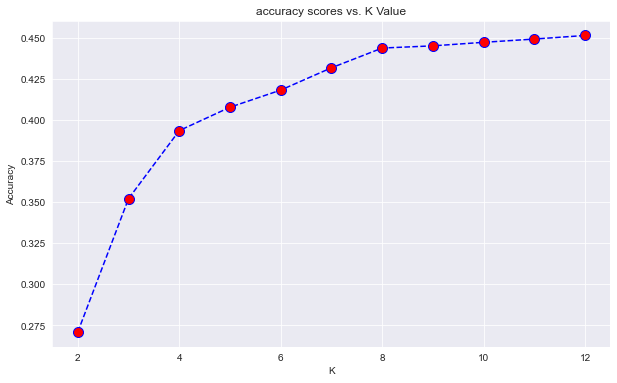

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(2,13),KNNscores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy') 
#I will choose 8 as the KNN since marginal accuracy is getting flat for k > 8

## Model

In [34]:
model = KNeighborsRegressor(n_neighbors=8)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [35]:
predictions = model.predict(X_test)
scoreKNN = model.score(X_test, y_test)

In [36]:
scoreKNN
#run random forest to get the feature importance

0.44398582789517316

# Random Forest

In [37]:
df

,artist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,artist_followers,in_spotify_fr_playlist,duration_s,era
track_id,,,,,,,,,,,,,,,,,,
3RvVFTMSlEXJjtoLrcDflF,rock,0.499,0.362,7,-16.331,1,0.0378,0.186000,0.175000,0.1190,0.354,177.691,4,38,10948,0,3.91,1990-2010
5w8bF2RGgf9PkXEoEl8SSN,rock,0.398,0.685,7,-9.098,0,0.0417,0.417000,0.005580,0.0787,0.376,109.994,4,32,10948,0,3.09,2011-2020
5u9zU1N1urKWaULrbEhMpr,rock,0.714,0.928,0,-7.118,1,0.0385,0.034300,0.746000,0.1370,0.487,120.007,4,29,10948,0,3.60,2011-2020
1TC9cYi9ZlEAhpoyd5sYn4,rock,0.519,0.728,4,-6.660,0,0.0290,0.103000,0.000518,0.0652,0.321,86.026,4,26,10948,0,3.78,2011-2020
2YiGsf5CLUtgty23h1RNOQ,rock,0.574,0.635,3,-6.683,1,0.0242,0.000765,0.001020,0.3640,0.521,99.994,4,10,10948,0,4.11,2011-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4kP1f09mjeK56QEykWC7Sk,pop,0.762,0.451,5,-9.501,0,0.0848,0.257000,0.000000,0.0984,0.874,129.918,4,6,2788,0,3.15,>2020
0LA1EZMkLVyafay8DQjS21,pop,0.709,0.724,3,-4.928,1,0.0608,0.316000,0.000000,0.0623,0.495,109.079,4,24,990,0,2.89,>2020
6JYM6Dz5szNhAIHlAd37Cb,pop,0.429,0.787,5,-6.510,0,0.2840,0.075100,0.000000,0.0879,0.563,60.031,4,22,990,0,2.77,2011-2020


In [38]:
df_encoded = pd.get_dummies(df, drop_first=True) # i'm lazy
df_encoded

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,artist_followers,duration_s,artist_genre_hip_hop,artist_genre_pop,artist_genre_rock,key_1,key_10,key_11,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5,in_spotify_fr_playlist_1,era_2011-2020,era_<1990,era_>2020
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3RvVFTMSlEXJjtoLrcDflF,0.499,0.362,-16.331,0.0378,0.186000,0.175000,0.1190,0.354,177.691,38,10948,3.91,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
5w8bF2RGgf9PkXEoEl8SSN,0.398,0.685,-9.098,0.0417,0.417000,0.005580,0.0787,0.376,109.994,32,10948,3.09,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
5u9zU1N1urKWaULrbEhMpr,0.714,0.928,-7.118,0.0385,0.034300,0.746000,0.1370,0.487,120.007,29,10948,3.60,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1TC9cYi9ZlEAhpoyd5sYn4,0.519,0.728,-6.660,0.0290,0.103000,0.000518,0.0652,0.321,86.026,26,10948,3.78,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2YiGsf5CLUtgty23h1RNOQ,0.574,0.635,-6.683,0.0242,0.000765,0.001020,0.3640,0.521,99.994,10,10948,4.11,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4kP1f09mjeK56QEykWC7Sk,0.762,0.451,-9.501,0.0848,0.257000,0.000000,0.0984,0.874,129.918,6,2788,3.15,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
0LA1EZMkLVyafay8DQjS21,0.709,0.724,-4.928,0.0608,0.316000,0.000000,0.0623,0.495,109.079,24,990,2.89,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
6JYM6Dz5szNhAIHlAd37Cb,0.429,0.787,-6.510,0.2840,0.075100,0.000000,0.0879,0.563,60.031,22,990,2.77,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [39]:
y = df_encoded['popularity']
X = df_encoded.drop(['popularity'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Hyperparameter tuning - finding best set of parameters

In [40]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 500, 1000],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
#    'max_samples' : ['None', 0.5]
    }
clf = RandomForestRegressor(random_state=100)

grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

## Model

In [41]:
from sklearn.model_selection import cross_val_score
clf = RandomForestRegressor(random_state=0, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=1000)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7916801371809135


In [42]:
clf.fit( X_train, y_train)
X_train.head()
feature_names = X_train.columns
feature_names = list(feature_names)

feat_imp = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
feat_imp.columns = ['columns_name', 'score_feature_importance']
feat_imp.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
9,artist_followers,0.499151
30,in_spotify_fr_playlist_1,0.059272
0,danceability,0.050042
5,instrumentalness,0.035047
4,acousticness,0.034847
3,speechiness,0.030602
10,duration_s,0.030569
11,artist_genre_hip_hop,0.029747
8,tempo,0.027544
1,energy,0.027303


# MODEL COMPARISON

In [53]:
summary = pd.DataFrame(columns = ['scores'], index = ['Linear regression', 'KNN','Random Forest'])
summary['scores']= [LR_A_score, scoreKNN, np.mean(cross_val_scores)]
summary

,scores
Linear regression,0.526186
KNN,0.443986
Random Forest,0.791680


Random Forest algorythm seems to be the most accurate one to predict track_popularity. If I had to move it into production, I would go with Random Forest.